# Scikit-learn - Topic 1 - Linear Models for Regression and Classification

## <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%202%20-%20Unit%20Objective.png"> Topic Objectives

* Implement and Evaluate Linear Models for Regression and Classification



---

## <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%204%20-%20Import%20Package%20for%20Learning.png"> Import Packages for Learning Material

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

---

## <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Scikit-learn - Topic 1 - Linear Models for Regression and Classification


In this topic, we will cover the practical Python implementation of fitting a pipeline for Linear Regression and Logistic Regression.
* This is a practical Python implementation of the theory covered in the previous video lessons.

Understanding the fundamentals of linear and logistic regression is essential for anyone looking to excel in data analytics and machine learning. These foundational techniques are widely used in various industries to make predictions, inform decisions, and understand relationships within data.

Scikit-learn is one of the most popular and powerful libraries for machine learning in Python. Learning to use it effectively is a crucial skill for any data analyst.

Linear regression is used to model the relationship between a dependent variable and one or more independent variables. It's widely applied in fields like finance (predicting stock prices), healthcare (predicting disease progression), and marketing (forecasting sales).

Logistic regression is essential for binary classification problems such as spam detection, medical diagnosis, and credit scoring.


<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> A typical workflow used for supervised learning is:
* Split the dataset into a train and test set.
* Fit the model using the train set, either using a pipeline or not.
* Evaluate your model using the test set. If the model performance is not good, revisit the process, starting from collecting the data, then conducting EDA (Exploratory Data Analysis) etc.



---

### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Regression: Linear Regression

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> We will use the California Housing dataset from sklearn. It has house price records and characteristics, like the average occupation and the house age.

* The approach to load the data from sklearn is a bit different from how you did it in seaborn.
* In this case, data comes as a Python dictionary structure, so you need to use the key to get the value (like data.data, data.features_names, data.target) to arrange the DataFrame
* The target feature is the median value of owner-occupied homes in thousands of dollars. 


<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%206%20-%20Warning.png"> Just as an aside this data does not need cleaning or feature engineering to train a model.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = pd.Series(data.target)

print(df.shape)
df.head()

(20640, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> As our workflow suggests, we split the data into train and test set
* We parse the features (all data minus the target) and the target (`df['target']`)
* `test_size` is 20% and `random_state` is 101. These are the standard values we'll use going forward.
* It is a good practice to inspect the train and test set shape. You will see the x and y are split 80:20, and there are eight features as seen in the previous DataFrame.

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                    df.drop(['target'], axis=1),
                                    df['target'],
                                    test_size=0.2,
                                    random_state=101
                                    )

print(
    "* Train set:",
    X_train.shape,
    y_train.shape,
    "\n* Test set:",
    X_test.shape,
    y_test.shape,
)

* Train set: (16512, 8) (16512,) 
* Test set: (4128, 8) (4128,)


<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> Our target variable is the house price, which is a continuous variable. So, we will create a pipeline to handle that.

* We import Pipeline, StandardScaler and select from the model
* To speed up the process, we know the dataset doesn't require any data cleaning or feature engineering. When we work with a dataset that needs it, we will inform you and suggest a transformer for that. In the workplace, that will be the data practitioner's task. But for learning purposes, we focus on the modelling and evaluation aspects.
* We also import the linear regression algorithm. The documentation is [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
* We define a function to create a pipeline with three steps: feature scaling, feature selection and model. It is convenient to arrange everything in a custom function for a given pipeline.
* Just to emphasise, in the feature selection, we parse to ``SelectFromModel()`` the model we will use, in this case, Linear Regression.

**WARNING** <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%206%20-%20Warning.png"> 
* The code is already written here, but you will likely write it for yourself for your capstone project and in the workplace.
* We are familiar with the idea of arranging the pipeline in a series of steps. However, as you may already know, mistyping code is inevitable. When you write the pipeline, please remember you will  almost certainly mistype or miss out on commas or parenthesis "(". If you mistype something, don't worry, as the code linter or Python will alert you with an error. 

In [4]:
from sklearn.pipeline import Pipeline

### Feat Scaling
from sklearn.preprocessing import StandardScaler

### Feat Selection
from sklearn.feature_selection import SelectFromModel

### ML algorithms 
from sklearn.linear_model import LinearRegression

def pipeline_linear_regression():
    """
    Create a pipeline for linear regression.

    This function creates a pipeline that performs feature scaling, feature selection,
    and linear regression modeling.

    Returns:
        pipeline (Pipeline): The pipeline object that performs the specified steps.
    """
    pipeline = Pipeline(
        [
            ("feat_scaling", StandardScaler()),
            ("feat_selection", SelectFromModel(LinearRegression())),
            ("model", LinearRegression()),
        ]
    )

    return pipeline

pipeline_linear_regression()

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('feat_scaling', ...), ('feat_selection', ...), ...]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True
,"estimator estimator: objectThe base estimator from which the transformer is built.This can be both a fitted (if ``prefit`` is set to True)or a non-fitted estimator. The estimator should have a``feature_importances_`` or ``coef_`` attribute after fitting.Otherwise, the ``importance_getter`` parameter should be used.",LinearRegression()
,"threshold threshold: str or float, default=NoneThe threshold value to use for feature selection. Features whoseabsolute importance value is greater or equal are kept while the othersare discarded. If ""median"" (resp. ""mean""), then the ``threshold`` valueis the median (resp. the mean) of the feature importances. A scalingfactor (e.g., ""1.25*mean"") may also be used. If None and if theestimator has a parameter penalty set to l1, either explicitlyor implicitly (e.g, Lasso), the threshold used is 1e-5.Otherwise, ""mean"" is used by default.",None
,"prefit prefit: bool, default=FalseWhether a prefit model is expected to be passed into the constructordirectly or not.If `True`, `estimator` must be a fitted estimator.If `False`, `estimator` is fitted and updated by calling`fit` and `partial_fit`, respectively.",False
,"norm_order norm_order: non-zero int, inf, -inf, default=1Order of the norm used to filter the vectors of coefficients below``threshold`` in the case where the ``coef_`` attribute of theestimator is of dimension 2.",1


We define the object `pipeline` based on `pipeline_linear_regression()`, then fit the train set (X_train and y_train)

In [5]:
pipeline = pipeline_linear_regression()
pipeline.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('feat_scaling', ...), ('feat_selection', ...), ...]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True
,"estimator estimator: objectThe base estimator from which the transformer is built.This can be both a fitted (if ``prefit`` is set to True)or a non-fitted estimator. The estimator should have a``feature_importances_`` or ``coef_`` attribute after fitting.Otherwise, the ``importance_getter`` parameter should be used.",LinearRegression()
,"threshold threshold: str or float, default=NoneThe threshold value to use for feature selection. Features whoseabsolute importance value is greater or equal are kept while the othersare discarded. If ""median"" (resp. ""mean""), then the ``threshold`` valueis the median (resp. the mean) of the feature importances. A scalingfactor (e.g., ""1.25*mean"") may also be used. If None and if theestimator has a parameter penalty set to l1, either explicitlyor implicitly (e.g, Lasso), the threshold used is 1e-5.Otherwise, ""mean"" is used by default.",None
,"prefit prefit: bool, default=FalseWhether a prefit model is expected to be passed into the constructordirectly or not.If `True`, `estimator` must be a fitted estimator.If `False`, `estimator` is fitted and updated by calling`fit` and `partial_fit`, respectively.",False
,"norm_order norm_order: non-zero int, inf, -inf, default=1Order of the norm used to filter the vectors of coefficients below``threshold`` in the case where the ``coef_`` attribute of theestimator is of dimension 2.",1


<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> Great. Once the pipeline is fitted, we want to start evaluating it. First, we want to know the linear model coefficients by extracting from the model the attribute `.coef_`
* We create a custom function to grab that in place in a DataFrame together with the columns and sort by the absolute values from the coefficients. We'll call this function later in the notebook. 

In [6]:
def linear_model_coefficients(model, columns):
    """
    Print the intercept and coefficients of a linear model.

    Parameters:
    model (object): The trained linear model object.
    columns (array-like): The column names corresponding to the coefficients.

    Returns:
    None
    """
    print(f"* Interception: {model.intercept_}")
    coeff_df = pd.DataFrame(model.coef_, columns, columns=["Coefficient"]).sort_values(
        ["Coefficient"], key=abs, ascending=False
    )
    print("* Coefficients")
    print(coeff_df)

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> As we have seen, we need to parse the model and the columns that the pipeline is trained on
* To parse the model only, we subset the model from the pipeline with `pipeline['model']` (in this case, we named this step as 'model', but you could have named it as 'ml_model', so you would use the lowercase with underscore notation)
* To parse the columns, we subset the feature selection step where we grab a boolean array informing which features hit the model - `pipeline['feat_selection'].get_support()`. Then this array is used to subset the features from train set columns.

Let's make one exercise to visualise everything we read.
* Here, we subset the model step from the pipeline

In [7]:
pipeline['model']

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


Here we subset the boolean array that tells which features hit the model
* Note the second element is False, meaning the second feature from the train set was removed in this step.

In [8]:
pipeline['feat_selection'].get_support()

array([ True, False, False, False, False, False,  True,  True])

Here, we parse this array to train set columns

In [9]:
X_train.columns[pipeline['feat_selection'].get_support()]

Index(['MedInc', 'Latitude', 'Longitude'], dtype='object')

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> Now that we are comfortable with what happens on the back end for extracting information from the pipeline, we want to learn the model coefficients.
* In the simplest straight-line fit for a scatterplot, the intercept is where the line crosses the y-axis, and the coefficient is the slope of the line. 
* In this case, we have a multiple linear regression since we have multiple features hitting the model. 
* We notice that Latitude has the highest absolute value, which indicates it is the most important feature for this model. But then we ask: Is this model good?

In [10]:
linear_model_coefficients(
    model=pipeline['model'],
    columns=X_train.columns[pipeline['feat_selection'].get_support()])

* Interception: 2.0660510895106596
* Coefficients
           Coefficient
Latitude     -1.038871
Longitude    -1.003760
MedInc        0.693899


<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> Next, we want to evaluate how good the pipeline fits the train and test set
* In simple terms, the performance metrics for regression are how far the scatterplot points are from the straight line. 
* This is given as an error value where a smaller error means a better model fit. 
* Read the pseudo-code in the function docstrings to understand the logic better. The main goal of this notebook is to understand the logic and why it is important for us now.
* We will use these functions in the rest of the course when we evaluate regression models.

In [11]:
# import regression metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error 
# we will use numpy to calculate RMSE based on MSE (mean_squared_error)
import numpy as np


def regression_performance(X_train, y_train, X_test, y_test, pipeline):
    """
    Gets train/test sets and pipeline and evaluates the performance
    for each set (train and test) by calling regression_evaluation()
    which will evaluate the pipeline performance.

    Parameters:
    - X_train: The input features of the training set.
    - y_train: The target values of the training set.
    - X_test: The input features of the test set.
    - y_test: The target values of the test set.
    - pipeline: The regression pipeline to evaluate.

    Returns:
    None
    """

    print("Model Evaluation \n")
    print("* Train Set")
    regression_evaluation(X_train, y_train, pipeline)
    print("* Test Set")
    regression_evaluation(X_test, y_test, pipeline)


def regression_evaluation(X, y, pipeline):
    """
    Gets features and target (either from train or test set) and pipeline.
    
    Args:
        X (array-like): The input features.
        y (array-like): The target values.
        pipeline (object): The trained pipeline for regression.
    
    Returns:
        None
    
    Prints the following performance metrics comparing the prediction to the target:
    - R2 Score
    - Mean Absolute Error
    - Mean Squared Error
    - Root Mean Squared Error
    """
    prediction = pipeline.predict(X)
    print("R2 Score:", r2_score(y, prediction))
    print("Mean Absolute Error:", mean_absolute_error(y, prediction))
    print("Mean Squared Error:", mean_squared_error(y, prediction))
    print(
        "Root Mean Squared Error:", np.sqrt(mean_squared_error(y, prediction)))
    print("\n")

  

def regression_evaluation_plots(X_train, y_train, X_test, y_test, pipeline, alpha_scatter=0.5):
    """
    Gets Train and Test set (features and target), pipeline, and adjusts dots transparency
    at scatter plot.

    Parameters:
    - X_train (array-like): Training set features.
    - y_train (array-like): Training set target.
    - X_test (array-like): Test set features.
    - y_test (array-like): Test set target.
    - pipeline (object): Trained regression pipeline.
    - alpha_scatter (float, optional): Transparency level for scatter plot dots. Default is 0.5.

    Returns:
    None

    Functionality:
    - Predicts on the train and test set using the provided pipeline.
    - Creates Actual vs Prediction scatterplots for the train and test set.
    - Draws a red diagonal line. In theory, a good regressor should predict
        close to the actual, meaning the dot should be close to the diagonal red line.
        The closer the dots are to the line, the better.
    - Displays the scatterplots.
    """
    pred_train = pipeline.predict(X_train)
    pred_test = pipeline.predict(X_test)

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
    sns.scatterplot(x=y_train, y=pred_train, alpha=alpha_scatter, ax=axes[0])
    sns.lineplot(x=y_train, y=y_train, color="red", ax=axes[0])
    axes[0].set_xlabel("Actual")
    axes[0].set_ylabel("Predictions")
    axes[0].set_title("Train Set")

    sns.scatterplot(x=y_test, y=pred_test, alpha=alpha_scatter, ax=axes[1])
    sns.lineplot(x=y_test, y=y_test, color="red", ax=axes[1])
    axes[1].set_xlabel("Actual")
    axes[1].set_ylabel("Predictions")
    axes[1].set_title("Test Set")

    plt.show()

Let's use the custom regression evaluation function.
* Note that the performance on the train and test set is not too different. That indicates that the model didn't overfit.
* Overfitting is when a model fits the train set data so closely that it will only model that data and is not good at predicting based on the test set data or any other unseen data. 
* At the same time, the test set performance (which is the best data to simulate real data since the model has never seen it) has an R2 performance of 0.57. This result is not too good and not too bad. You may want to look for something better, but it is a good R2 value for a first model.
* We also note in the plots that Prediction x Actual plot, the predictions tend to follow the actual value (since the blue dots broadly follow the red diagonal line)

Model Evaluation 

* Train Set
R2 Score: 0.5871179233179742
Mean Absolute Error: 0.5457147032791132
Mean Squared Error: 0.5476623630599431
Root Mean Squared Error: 0.7400421360030408


* Test Set
R2 Score: 0.5729574907796264
Mean Absolute Error: 0.5549245599238322
Mean Squared Error: 0.5773080434275145
Root Mean Squared Error: 0.7598078990294287




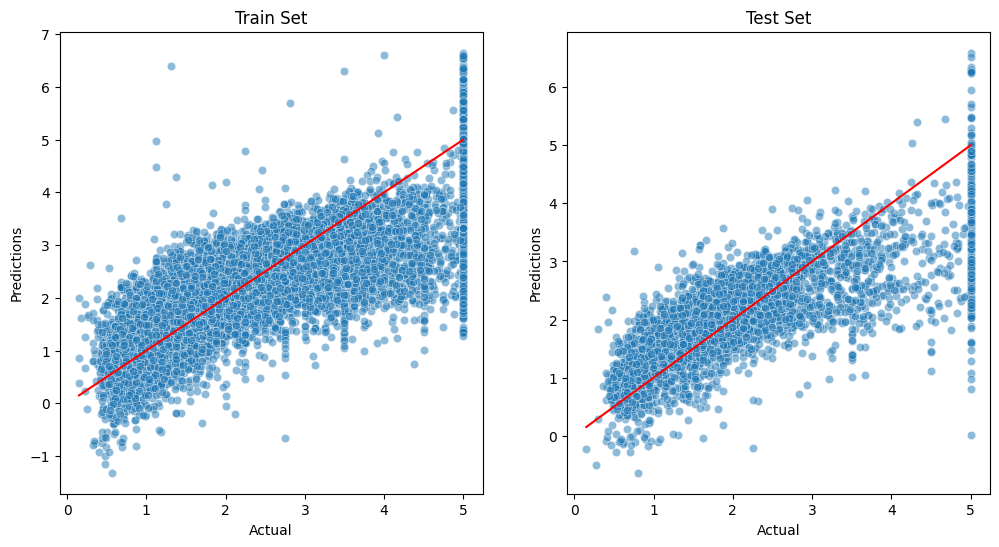

In [12]:
regression_performance(X_train, y_train, X_test, y_test, pipeline)
regression_evaluation_plots(
    X_train, y_train, X_test, y_test, pipeline, alpha_scatter=0.5
)

That concludes the Python example for a Linear regression. Now let's try a logistic regression. 

---

### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Classification: Logistic Regression

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> This time we will use the breast cancer dataset from sklearn as it a binary classification problem. It shows records for a breast mass sample and a diagnosis informing whether it is a 0 (Malignant) or 1 (Benign).
* Again, this is a sklearn dataset, so load it as we did for the California dataset.

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%206%20-%20Warning.png"> As an aside, this data won't need data cleaning or feature engineering to train a model.

In [13]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = pd.Series(data.target)
print(df.shape)
df.head()

(569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png">  As usual, we start our workflow by splitting the data into train and test sets.
* We use the same code and values as in the previous example.

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.drop(["target"], axis=1), df["target"], test_size=0.2, random_state=101
)

print(
    "* Train set:",
    X_train.shape,
    y_train.shape,
    "\n* Test set:",
    X_test.shape,
    y_test.shape,
)

* Train set: (455, 30) (455,) 
* Test set: (114, 30) (114,)


<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> Our target variable is 0 (Malignant) and 1 (Benign), which is a categorical variable. We will create a pipeline to handle that, which will be a binary classifier.
* We also import the logistic regression algorithm. The documentation is [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
* We define a function to create a pipeline with three steps: feature scaling, feature selection and model. It is convenient to arrange everything in a custom function for a given pipeline.
* Just a reminder, we parse the model to `SelectFromModel()` in the feature selection. We will use this pattern all the time. In this case, we will use Logistic Regression

In [15]:
from sklearn.pipeline import Pipeline

### Feat Scaling
from sklearn.preprocessing import StandardScaler

### Feat Selection
from sklearn.feature_selection import SelectFromModel

### ML algorithms 
from sklearn.linear_model import LogisticRegression

def pipeline_logistic_regression():
    """
    Create a pipeline for logistic regression.

    Returns:
        pipeline (Pipeline): A pipeline object that consists of feature scaling, feature selection, and logistic regression model.
    """
    pipeline = Pipeline(
        [
            ("feat_scaling", StandardScaler()),
            ("feat_selection", SelectFromModel(LogisticRegression(random_state=101))),
            ("model", LogisticRegression(random_state=101)),
        ]
    )

    return pipeline

We define the object pipeline based on pipeline_logistic_regression(), then fit to the train set (X_train and y_train)

In [16]:
pipeline = pipeline_logistic_regression()
pipeline.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('feat_scaling', ...), ('feat_selection', ...), ...]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True
,"estimator estimator: objectThe base estimator from which the transformer is built.This can be both a fitted (if ``prefit`` is set to True)or a non-fitted estimator. The estimator should have a``feature_importances_`` or ``coef_`` attribute after fitting.Otherwise, the ``importance_getter`` parameter should be used.",LogisticRegre...dom_state=101)
,"threshold threshold: str or float, default=NoneThe threshold value to use for feature selection. Features whoseabsolute importance value is greater or equal are kept while the othersare discarded. If ""median"" (resp. ""mean""), then the ``threshold`` valueis the median (resp. the mean) of the feature importances. A scalingfactor (e.g., ""1.25*mean"") may also be used. If None and if theestimator has a parameter penalty set to l1, either explicitlyor implicitly (e.g, Lasso), the threshold used is 1e-5.Otherwise, ""mean"" is used by default.",None
,"prefit prefit: bool, default=FalseWhether a prefit model is expected to be passed into the constructordirectly or not.If `True`, `estimator` must be a fitted estimator.If `False`, `estimator` is fitted and updated by calling`fit` and `partial_fit`, respectively.",False
,"norm_order norm_order: non-zero int, inf, -inf, default=1Order of the norm used to filter the vectors of coefficients below``threshold`` in the case where the ``coef_`` attribute of theestimator is of dimension 2.",1


<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> Great. Once the pipeline is fitted, we want to start evaluating it. First, we want to know the model coefficients by extracting from the model the attribute `.coef_`
* We create a custom function to grab that in place in a DataFrame together with the columns, then we transpose it and sort by the absolute values from the coefficients

In [17]:
def logistic_regression_coef(model, columns):
    """
    Prints the coefficients of a logistic regression model.

    Parameters:
    - model: The trained logistic regression model.
    - columns: The column names corresponding to the coefficients.

    Returns:
    None
    """
    coeff_df = pd.DataFrame(
        model.coef_, index=["Coefficient"], columns=columns
    ).T.sort_values(["Coefficient"], key=abs, ascending=False)
    print(coeff_df)

We parse the data in a similar way to the previous section:
* The model parameter uses the model step from the pipeline as an argument
* The columns parameters argument is the train set features, subset by an array that tells which features were selected by `feat_selection` pipeline step

In [18]:
logistic_regression_coef(
    model=pipeline["model"],
    columns=X_train.columns[pipeline["feat_selection"].get_support()],
)

                         Coefficient
worst texture              -1.391576
radius error               -1.336975
worst radius               -1.273596
worst concave points       -1.248099
mean concave points        -1.220252
worst area                 -1.137920
area error                 -1.030315
worst perimeter            -0.942304
fractal dimension error     0.892214
worst concavity            -0.767812
worst fractal dimension    -0.700420
mean concavity             -0.690310
worst smoothness           -0.666126
compactness error           0.635464
mean compactness            0.628231
perimeter error            -0.590119


<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> Next, we want to evaluate how good the pipeline fits the train and test set
* The performance metrics for logistic regression, differ from linear. 
* As it is a binary classification the metric is a measure of the number of correct versus incorrect predictions. 
* Read the pseudo-code in the function docstrings to better understand the logic. The goal of this notebook is to understand the logic and why it is important for us now.
* We will use these functions in the rest of the course when we evaluate classification models.

In [19]:
# loads confusion_matrix and classification_report from sklearn
from sklearn.metrics import classification_report, confusion_matrix


def confusion_matrix_and_report(X, y, pipeline, label_map):
    """
    Gets features, target, pipeline, and how the levels from your target are labelled (named).
    In this case, 0 (Malignant) and 1 (Benign), so you parse a list ['Malignant' , 'Benign'].

    Args:
        X (array-like): The input features.
        y (array-like): The target values.
        pipeline (object): The trained pipeline model.
        label_map (list): The list of labels for the target values.

    Returns:
        None

    This function performs the following steps:
    - Predicts the target values based on the input features using the provided pipeline.
    - Computes and displays the confusion matrix, which compares the predicted values with the actual values.
      The predicted values are shown as rows, and the actual values are shown as columns in the matrix.
    - Displays the classification report, which provides metrics such as precision, recall, and F1-score.

    """

    prediction = pipeline.predict(X)

    print("---  Confusion Matrix  ---")
    print(
        pd.DataFrame(
            confusion_matrix(y_true=prediction, y_pred=y),
            columns=[["Actual " + sub for sub in label_map]],
            index=[["Prediction " + sub for sub in label_map]],
        )
    )
    print("\n")

    print("---  Classification Report  ---")
    print(classification_report(y, prediction, target_names=label_map), "\n")


def clf_performance(X_train, y_train, X_test, y_test, pipeline, label_map):
    """
    Calculates and displays the performance metrics of a classification model.

    Parameters:
    - X_train (array-like): The feature matrix of the training set.
    - y_train (array-like): The target labels of the training set.
    - X_test (array-like): The feature matrix of the test set.
    - y_test (array-like): The target labels of the test set.
    - pipeline (object): The trained classification pipeline.
    - label_map (list): A list containing the labels for the target variable.

    Returns:
    None

    This function calculates and displays the confusion matrix and classification report
    for both the training set and the test set. The confusion matrix provides a summary
    of the model's performance by showing the number of true positives, true negatives,
    false positives, and false negatives. The classification report provides additional
    performance metrics such as precision, recall, and F1-score.

    Example usage:
    clf_performance(X_train, y_train, X_test, y_test, pipeline, ['Malignant', 'Benign'])
    """
    print("#### Train Set #### \n")
    confusion_matrix_and_report(X_train, y_train, pipeline, label_map)

    print("#### Test Set ####\n")
    confusion_matrix_and_report(X_test, y_test, pipeline, label_map)

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> Let's use the custom classification evaluation function.
* Note that the performance on the train and test set is not too different. That indicates that the model didn't overfit.
* Just a side note: Look at the confusion matrix. The actual values are in the columns, and the prediction is in the row. That is the explanation we gave in the pseudo-code. In the workplace, you may see that switch. That is fine; you just have to pay attention to where you see the actual and prediction labels.


<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> The confusion matrix shows the counts of when the classifier predicted properly or not for a given class. 
* For example, how many times did the model predict an actual malignant as malignant for the train set? That is 164.
* How many times has the model predicted a malignant as benign for the train set? That is 6.
* A false negative in a medical diagnosis might be considered worse than a false positive. It is better in medical diagnosis to err on the side of caution by have a few false positives rather than missing a diagnosis entirely.  


<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> The classification report shows the main metrics for the classification
* We see for each class the precision, recall and f1-score.
* Support is a count of the number of observations.
* We also see the accuracy, which is how often can we expect our ML model to correctly predict the outcome out of the total number of predictions made. 
* macro avg: it computes the average without considering the proportion. For example, on the train set in the precision column, it takes all precisions and calculates the average: `(0.99 + 0.98)/ 2`
* weighted avg: it computes the average considering the proportion. For example, on the train set in the precision column, it takes `[ 170/(170+285) * 0.99 ] + [ 285/(179-+285) * 0.98 ]`


<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%206%20-%20Warning.png"> Typically, we will tend to use precision, recall, f1-score and accuracy as metrics for classification.

Let's comment now on the results.
* Since the classes are not balanced (we have more benign than malignant), we probably will not choose accuracy. But let's assume we chose accuracy. The accuracy is very good on the train and test set. However, it is not a good metric for imbalanced datasets like this one, and it does not take into account the importance of different types of errors. For example, a false positive is not as severe as a false negative in this case. 
* Instead, let's focus on the recall metric. This metric gauges the ML model's ability to accurately predict positives from known positives. In this instance, your performance on the train set is 0.96, and on the test set is 0.95. This means that when dealing with live data, you can expect a 95% chance of not misclassifying a patient with a malignant tumour. The acceptability of this level will depend on your specific business problem and context. In a medical diagnosis, a high recall is crucial, as a low value indicates the model might incorrectly identify a benign tumour as malignant, which could be distressing and potentially life-threatening for the patient.

In [20]:
clf_performance(
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    pipeline=pipeline,
    label_map=["Malignant", "Benign"],
)

#### Train Set #### 

---  Confusion Matrix  ---
                     Actual Malignant Actual Benign
Prediction Malignant              164             2
Prediction Benign                   6           283


---  Classification Report  ---
              precision    recall  f1-score   support

   Malignant       0.99      0.96      0.98       170
      Benign       0.98      0.99      0.99       285

    accuracy                           0.98       455
   macro avg       0.98      0.98      0.98       455
weighted avg       0.98      0.98      0.98       455
 

#### Test Set ####

---  Confusion Matrix  ---
                     Actual Malignant Actual Benign
Prediction Malignant               40             0
Prediction Benign                   2            72


---  Classification Report  ---
              precision    recall  f1-score   support

   Malignant       1.00      0.95      0.98        42
      Benign       0.97      1.00      0.99        72

    accuracy                   

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> What if I don't know how to map my target variable for this custom function?
* In this example, we know that the number 0 for the target means 'Malignant' and 1 is 'Benign'. But what if I didn't?
* That is okay, and you just have to parse in a list of the ordered sequence of the classes as strings, like: ``["0", "1" ]``
*Let's try below. It will display the same result, and the difference is the ``label_map``

In [21]:
clf_performance(
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    pipeline=pipeline,
    label_map=["0", "1"],
)  # it will display the classes as 0 and 1
# but "0" and "1" should be a string

#### Train Set #### 

---  Confusion Matrix  ---
             Actual 0 Actual 1
Prediction 0      164        2
Prediction 1        6      283


---  Classification Report  ---
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       170
           1       0.98      0.99      0.99       285

    accuracy                           0.98       455
   macro avg       0.98      0.98      0.98       455
weighted avg       0.98      0.98      0.98       455
 

#### Test Set ####

---  Confusion Matrix  ---
             Actual 0 Actual 1
Prediction 0       40        0
Prediction 1        2       72


---  Classification Report  ---
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        42
           1       0.97      1.00      0.99        72

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98      